<a href="https://colab.research.google.com/github/mfnravi/ProfitPant/blob/main/Copy_of_AdvancedDL%26CV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**DESCRIPTION**


**Problem Statement:**
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.


**Dataset Details:**
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0


**Prerequisites:**
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

  i. Convolutional Layer

  ii. Pooling Layer

  iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

## **Task 1** - **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import cv2
from glob import glob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
%matplotlib inline

## **Task 2(a)** - **Load File**

Load file and view the list of files in the dataset

In [ ]:
# Mount drive to colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the NPZ file to data 
data = np.load("drive/My Drive/PG AI ML/ORL_faces.npz",allow_pickle=False)

# View files/folders present in data
lst = data.files
for item in lst:
    print(item)

testY
testX
trainX
trainY


In [ ]:
lst = data.files
for item in lst:
    print(item)
    print(data[item])
    print("\n")

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]


testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]


trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]


trainY
[ 0  0  0  0  0  0  0  0

**Observation:**

We can see that there are **4 folders** present in the given data set. **trainX, trainY, testX and testY**

**Train data** set contains **12 images** of each person (20 persons total)

**Test data** set contains **8 images** of each person (20 person total)

## **Task 3** - **Seperate the Train and Test Data**

**Analysis:**

**Train X** contains the **images** and **Train Y** contains the **Label** for those images

**Test X** contains **images** to test and **Test Y** contains the **Label** for those images.


In [ ]:
x_train,x_test,y_train,y_test=data['trainX'],data['testX'], data['trainY'],data['testY']
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240, 10304), (160, 10304), (240,), (160,))

## **Reshape the Train & Test Data to the shape required to display an image**

In [ ]:
x_train_img=np.reshape(x_train,(x_train.shape[0],112,-1))
print ("Reshaped Image of X_Train_img is: ", x_train_img.shape, "\n")
#plt.imshow(x_train[30])

Reshaped Image of X_Train_img is:  (240, 112, 92) 



In [ ]:
x_test_img=np.reshape(x_test,(x_test.shape[0],112,92))
print ("Reshaped Image of X_Test_img is: ", x_test_img.shape, "\n")

Reshaped Image of X_Test_img is:  (160, 112, 92) 



## **View Unique Faces that is present in Train Data set**

In [ ]:
print("unique target number:",np.unique(data['trainY']))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


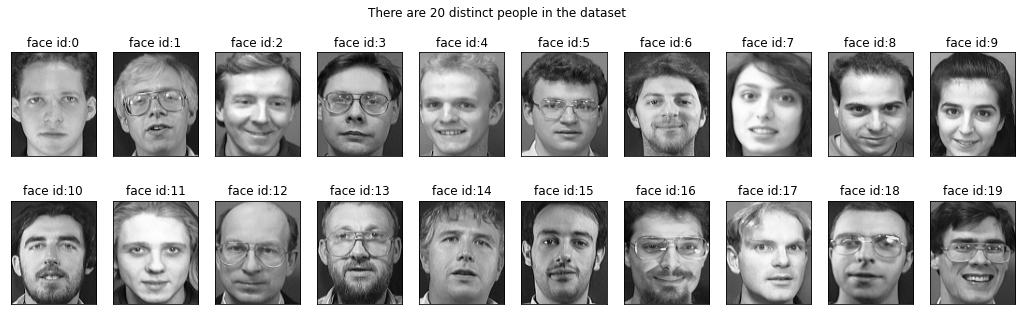

In [ ]:
def show_20_distinct_people(images, unique_ids):
  #Creating 2*10 subplots in  18x5 figure size
  fig, axarr=plt.subplots(nrows=2, ncols=10, figsize=(18, 5))
  
  #For easy iteration flattened 2X10 subplots matrix to 20 array
  axarr=axarr.flatten()

  #iterating over user ids
  for unique_id in unique_ids:
    image_index=unique_id*12
    axarr[unique_id].imshow(images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 20 distinct people in the dataset")

show_20_distinct_people(x_train_img, np.unique(data['trainY']))

### **View Unique Faces that is present in Test Data set**

In [ ]:
print("unique target number:",np.unique(data['testY']))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


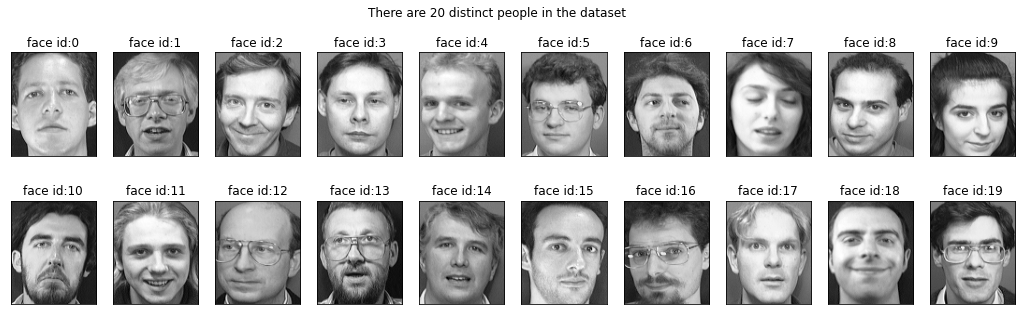

In [ ]:
def show_16_distinct_people(images, unique_ids):
  #Creating 2*10 subplots in  18x5 figure size
  fig, axarr=plt.subplots(nrows=2, ncols=10, figsize=(18, 5))
  
  #For easy iteration flattened 2X10 subplots matrix to 20 array
  axarr=axarr.flatten()

  #iterating over user ids
  for unique_id in unique_ids:
    image_index=unique_id*8
    axarr[unique_id].imshow(images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 20 distinct people in the dataset")

show_16_distinct_people(x_test_img, np.unique(data['testY']))

## **View different images of single person, present in Train Data**

Images of Single person in different posture, orientation, etc etc

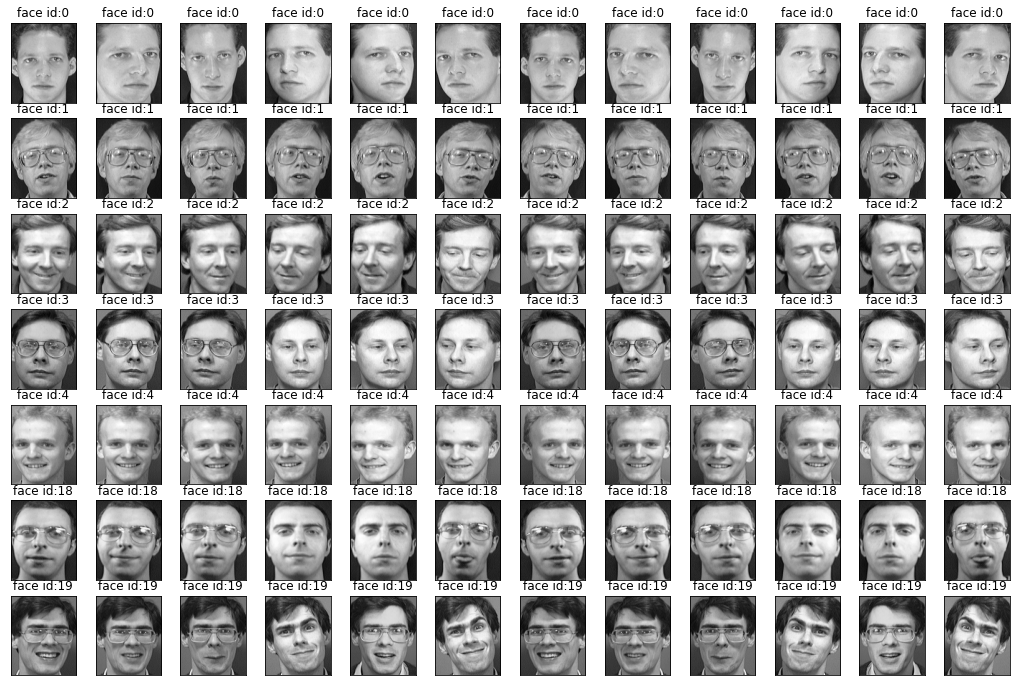

In [ ]:
def show_12_faces_of_n_subject(images, subject_ids):
    cols=12
    rows=(len(subject_ids)*12)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,12))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*12 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

show_12_faces_of_n_subject(images=x_train_img, subject_ids=[0, 1, 2 , 3, 4, 18, 19])

### **Different Images of single person, in Test Data set**

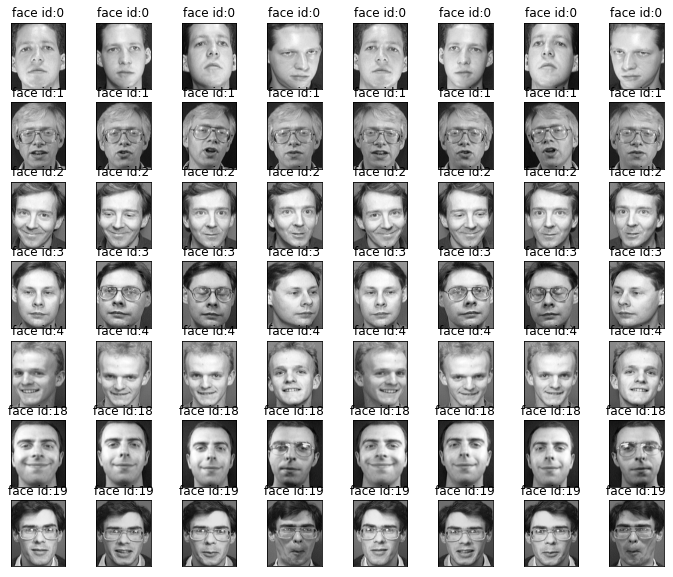

In [ ]:
def show_8_faces_of_n_subject(images, subject_ids):
    cols=8
    rows=(len(subject_ids)*8)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(12,10))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*8 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

show_8_faces_of_n_subject(images=x_test_img, subject_ids=[0, 1, 2 , 3, 4, 18, 19])

## **No of Sample for each Image**

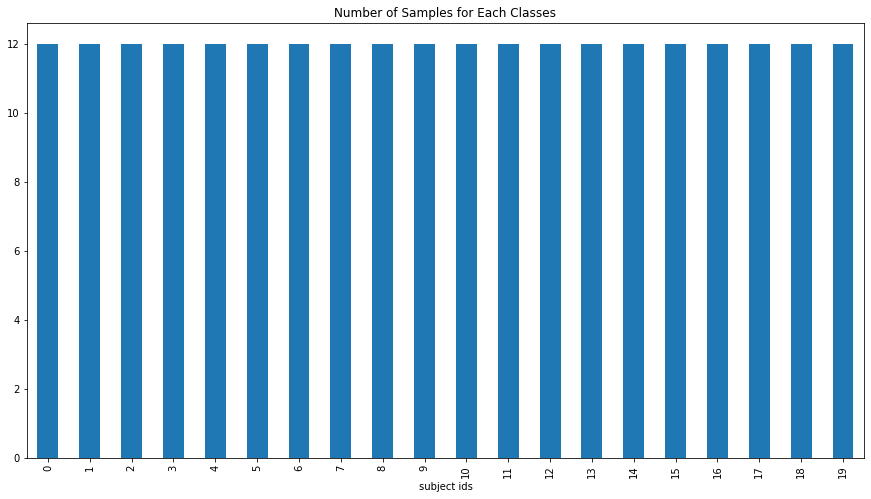

In [ ]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

## **Task 2(b)** - **Normalize the Data**

In [ ]:
print("-------------------------")
print("X train pixels:")
print("-------------------------")
print("Minimum Pixels: ", x_train.min(), "\t", "Maximum Pixels: ", x_train.max(), "\n")
x_train = np.array(x_train,dtype='float64')/255
print("Post Normalization")
print("Minimum Pixels: ", x_train.min(), "\t", "Maximum Pixels: ", x_train.max(), "\n")

print("--------------------------")
print("X test pixels:")
print("--------------------------")
print("Minimum Pixels: ", x_test.min(), "\t", "Maximum Pixels: ", x_test.max(), "\n")
x_test = np.array(x_test,dtype='float64')/255
print("Post Normalization")
print("Minimum Pixels: ", x_test.min(), "\t", "Maximum Pixels: ", x_test.max())


-------------------------
X train pixels:
-------------------------
Minimum Pixels:  0.0 	 Maximum Pixels:  244.0 

Post Normalization
Minimum Pixels:  0.0 	 Maximum Pixels:  0.9568627450980393 

--------------------------
X test pixels:
--------------------------
Minimum Pixels:  0.0 	 Maximum Pixels:  244.0 

Post Normalization
Minimum Pixels:  0.0 	 Maximum Pixels:  0.9568627450980393


## **Task 4 - Transform the images to equal sizes**

In [ ]:
#imageGrayScale = np.array([cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in x_train)

In [ ]:
x_train_final = np.array([cv2.resize(i,(112,92), interpolation=cv2.INTER_CUBIC) for i in x_train])
print("Shape of X Train: ", x_train_final.shape)

Shape of X Train:  (240, 92, 112)


In [ ]:
x_test_final = np.array([cv2.resize(i,(112,92), interpolation=cv2.INTER_CUBIC) for i in x_test])
print("Shape of X Test: ", x_test_final.shape)

Shape of X Test:  (160, 92, 112)


## **Changing classes count for Label**

In [ ]:
y_train_final = tf.keras.utils.to_categorical(y_train, num_classes=20, dtype='float32')
y_test_final = tf.keras.utils.to_categorical(y_test, num_classes=20, dtype='float32')

## **Task 5 - Creating CNN Model**

i. Convolutional Layer

ii. Pooling Layer

iii. Fully Connected Layer

In [ ]:
x_train_edited = np.array([np.reshape(i, (112, 92, 1)) for i in x_train])
x_test_edited = np.array([np.reshape(i, (112, 92, 1)) for i in x_test])
print(x_train_edited.shape,",",x_test_edited.shape)

(240, 112, 92, 1) , (160, 112, 92, 1)


In [ ]:
# Set Parameters
batchSize = 12
epochs = 200
tf.random.set_seed(2507)
np.random.seed(2507)

# Initialising the CNN
classifier = tf.keras.models.Sequential()

# Step 1 - Convolution  #No of Feature Maps, Filter, color image with channel,
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (112, 92, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(tf.keras.layers.Flatten())
#classifier.add(tf.keras.layers.GlobalAveragePooling2D())

# Step 4 - Full connection
classifier.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 20, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = "Adam" , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 9, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0

In [ ]:
#Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        
        if test_score > train_score and test_score > self.cl:
        #if test_score > self.cl:
            self.model.stop_training = True

## **Task 6 - Train the Model**

In [ ]:
myR2ScoreMonitor = MyThresholdCallBack(cl=0.90)

history = classifier.fit(x = x_train_edited, y = y_train_final,
                              validation_data = (x_test_edited, y_test_final),
                              steps_per_epoch= (x_train_final.shape[0])/batchSize,
                              epochs = epochs,
                              callbacks = [myR2ScoreMonitor],
                              validation_steps= (x_test_final.shape[0])/batchSize,  
                              verbose=2
                              )

Epoch 1/200
20/20 - 31s - loss: 3.0096 - accuracy: 0.0292 - val_loss: 2.9956 - val_accuracy: 0.0562
Epoch 2/200
20/20 - 0s - loss: 2.9974 - accuracy: 0.0458 - val_loss: 2.9955 - val_accuracy: 0.0500
Epoch 3/200
20/20 - 0s - loss: 2.9965 - accuracy: 0.0708 - val_loss: 2.9955 - val_accuracy: 0.0500
Epoch 4/200
20/20 - 0s - loss: 2.9987 - accuracy: 0.0583 - val_loss: 2.9951 - val_accuracy: 0.0500
Epoch 5/200
20/20 - 0s - loss: 2.9973 - accuracy: 0.0417 - val_loss: 2.9879 - val_accuracy: 0.1000
Epoch 6/200
20/20 - 0s - loss: 2.9988 - accuracy: 0.0458 - val_loss: 2.9904 - val_accuracy: 0.0500
Epoch 7/200
20/20 - 0s - loss: 2.9639 - accuracy: 0.0917 - val_loss: 2.8143 - val_accuracy: 0.1000
Epoch 8/200
20/20 - 0s - loss: 2.7484 - accuracy: 0.1417 - val_loss: 2.5424 - val_accuracy: 0.1813
Epoch 9/200
20/20 - 0s - loss: 2.3859 - accuracy: 0.2292 - val_loss: 2.0973 - val_accuracy: 0.1813
Epoch 10/200
20/20 - 0s - loss: 1.8035 - accuracy: 0.4000 - val_loss: 1.2359 - val_accuracy: 0.6500
Epoch 11

## **Task 7 - Train Results (Graph Visualization)**

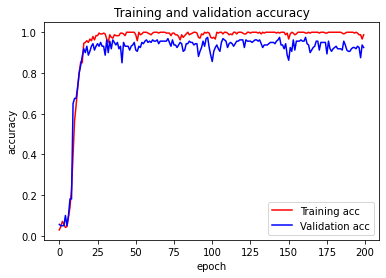

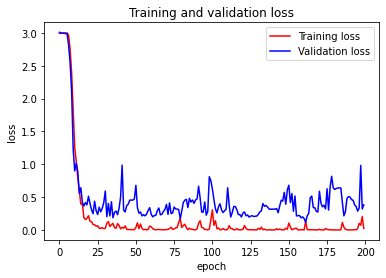

In [ ]:
#Graphing our training and validation
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

## **Task 8 - Model trained above 90% and generalized successfully**

In [ ]:
# training accuracy after final epoch
history.history['accuracy'][-1]

0.987500011920929

In [ ]:
# test accuracy after final epoch
history.history['val_accuracy'][-1]

0.925000011920929

## **Save The Model**

In [ ]:
#classifier.save("FaceDetection.tf")
classifier.save("/content/drive/My Drive/PG AI ML/FaceRecognition.h5")
classifier.save('FaceRecognition.tf2')

INFO:tensorflow:Assets written to: FaceRecognition.tf2/assets


## **Making Predictions**

In [ ]:
predictions = classifier.predict(x_test_edited)

In [ ]:
def plot_image(i, predictions, trueLabel, img):
  predictions_array, true_label, image = predictions[i], trueLabel[i], img[i]
  plt.xticks([])
  plt.yticks([])
  #plt.imshow(x_test_edited[0].reshape(112,92))
  plt.imshow(image.reshape(112,92), cmap="gray")
  actual_label = np.argmax(true_label)
  predicted_label = np.argmax(predictions_array)
  # print("True Label: ",y_test_final[1],"\n")
  # print("Prediction: ", predictions[1], "\n")
  print("Actual Label is: ", actual_label)
  print("Predicted Label is: ", predicted_label)
  if predicted_label == actual_label:
    color = "blue"
  else:
    color = "red"
  plt.xlabel("Face ID {} predicted matches {:2.0f}% to ({})".format(predicted_label, 100*np.max(predictions_array), actual_label, color=color))


Actual Label is:  0
Predicted Label is:  0


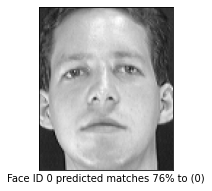

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plot_image(i, predictions, y_test_final, x_test_edited)

Actual Label is:  2
Predicted Label is:  2


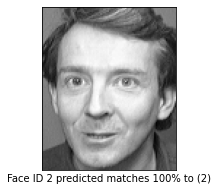

In [ ]:
j = 23
plt.figure(figsize=(6,3))
plot_image(j, predictions, y_test_final, x_test_edited)

Actual Label is:  4
Predicted Label is:  4


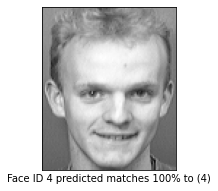

In [ ]:
k = 38
plt.figure(figsize=(6,3))
plot_image(k, predictions, y_test_final, x_test_edited)

## **Confusion Matrix**

In [ ]:
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = np.array([np.argmax(i) for i in y_test_final])
class_labels = np.unique(data["trainY"]) 

report = metrics.classification_report(true_classes, predicted_classes)
print(report)  

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       0.67      1.00      0.80         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.62      0.77         8
          16       0.89      1.00      0.94         8
          17       0.73    

## **Prediction on other Images**

In [ ]:
from keras.models import load_model
model = load_model('drive/My Drive/PG AI ML/FaceRecognition.h5')

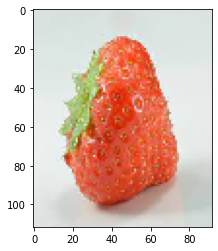

In [ ]:
imageLocation = ('drive/My Drive/PG AI ML/Fruits/Training/Strawberry/113_110.jfif')

#Load the Image
imageLoad = tf.keras.preprocessing.image.load_img(imageLocation , 
                                                  target_size=(112,92,1))

#Convert Image to Array
imageArray = tf.keras.preprocessing.image.img_to_array(imageLoad)

plt.imshow(imageLoad)

In [ ]:
#reshaping to RGB 1 channel : Method 1 
convertedImage=tf.image.rgb_to_grayscale(imageArray, name=None)
convertedImage.shape

TensorShape([112, 92, 1])

In [ ]:
compatible_image = np.array([convertedImage])
compatible_image.shape

(1, 112, 92, 1)

In [ ]:
newPredict = model.predict(compatible_image)
newPredict

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(newPredict)

17